In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [72]:
df = pd.read_json('data.json')
print(df.shape)
df.head()

(6000, 3)


,0,1,2
0,-3.005382,-1.701191,1
1,-2.908105,-1.699589,1
2,-2.958954,-1.660940,1
3,-2.922840,-1.638722,1
4,-2.924240,-1.508256,1


In [73]:
df.tail()

,0,1,2
5995,2.977109,1.471810,1
5996,2.987465,1.498655,1
5997,2.863268,1.543203,1
5998,2.929324,1.621393,1
5999,2.988666,1.577512,1


In [74]:
df[2].loc[df[2]==1].count()

4679

4679 out of 6000 entries are 1, implying that this is a class imbalanced set.

In [75]:
y_tr_arr = np.array(df[2])
X_tr_arr = df[[0,1]]

In [76]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [77]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    w_arr=np.squeeze(np.asarray(w))
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))+np.dot(w_arr,w_arr)
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [78]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [79]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [80]:
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01,no_iterations=2000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)

Number of Features 2
Optimized weights [[0.06718674 0.01441553]]
Optimized intercept 1.2402001817926414


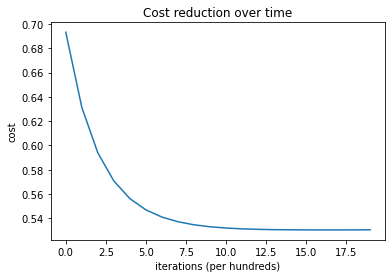

In [81]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()